In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

### Load CSV file and Read

In [6]:
auditors = pd.read_csv('auditors.csv' )
auditors.head()

,Auditor ID,First,Last,Region
0,234,Sue,Smith,Northern California
1,536,Bob,Smith,Northern California
2,98,Jack,Smith,New York
3,203,Jill,Smith,New York
4,304,Jerry,Johnson,Texas


In [7]:
prices = pd.read_csv('prices.csv' )
prices.head()

,Auditor ID,Date,Price,Store ID,UPC
0,234,10/18/2017,24.95,66999,268588472
1,234,10/27/2017,49.71,66999,475245085
2,234,10/20/2017,25.75,66999,126967843
3,234,10/23/2017,18.81,66999,708930835
4,234,10/23/2017,33.32,66999,325885139


### Import json Library and Load Json file.

In [9]:
import json
%matplotlib inline
with open("stores.json") as datafile:
  stores = json.load(datafile)
stores = pd.DataFrame(stores)
stores.head()

,Store ID,Banner,Region
0,66999,Walmart,Northern California
1,4698,Trader Joes,Northern California
2,39482,Safeway,Northern California
3,34957,Whole Foods,Northern California
4,12837,Walmart,New York


### Merge certain columns of prices table with auditors table.

In [10]:
result = pd.merge(auditors, prices[['Auditor ID','Price', 'Store ID','UPC']],on='Auditor ID')
result.head()

,Auditor ID,First,Last,Region,Price,Store ID,UPC
0,234,Sue,Smith,Northern California,24.95,66999,268588472
1,234,Sue,Smith,Northern California,49.71,66999,475245085
2,234,Sue,Smith,Northern California,25.75,66999,126967843
3,234,Sue,Smith,Northern California,18.81,66999,708930835
4,234,Sue,Smith,Northern California,33.32,66999,325885139


### Merge certain columns of stores table with result table.

In [11]:
result1 = pd.merge(result, stores[['Store ID','Banner']],on='Store ID')
result1.head()

,Auditor ID,First,Last,Region,Price,Store ID,UPC,Banner
0,234,Sue,Smith,Northern California,24.95,66999,268588472,Walmart
1,234,Sue,Smith,Northern California,49.71,66999,475245085,Walmart
2,234,Sue,Smith,Northern California,25.75,66999,126967843,Walmart
3,234,Sue,Smith,Northern California,18.81,66999,708930835,Walmart
4,234,Sue,Smith,Northern California,33.32,66999,325885139,Walmart


### Drop the columns which are not required

In [12]:
result2=result1.drop(columns=['Auditor ID','First','Last','Store ID'])
result2.head()

,Region,Price,UPC,Banner
0,Northern California,24.95,268588472,Walmart
1,Northern California,49.71,475245085,Walmart
2,Northern California,25.75,126967843,Walmart
3,Northern California,18.81,708930835,Walmart
4,Northern California,33.32,325885139,Walmart


### Crosstab of the dataframe

In [13]:
result3=pd.crosstab([result2.Banner, result2.UPC],result2.Region,values=result2.Price,aggfunc=np.sum)
result3.head()

Region            Kansas  New York  Northern California  Texas
Banner  UPC                                                   
Safeway 11873171     NaN      6.09                  NaN   5.19
        15052612   53.99       NaN                  NaN  54.49
        16482322   17.89       NaN                  NaN  18.09
        16729338    7.99      9.39                  NaN   8.09
        16829288    3.59      4.19                  NaN   3.59

### Count missing values for each columns

In [14]:
result3.isna().sum()

Region
Kansas                 1844
New York               1600
Northern California    3603
Texas                  1166
dtype: int64

### Count non-null values for each columns

In [15]:
result3.info() #no null objects

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4931 entries, (Safeway, 11873171) to (Whole Foods, 999185078)
Data columns (total 4 columns):
Kansas                 3087 non-null float64
New York               3331 non-null float64
Northern California    1328 non-null float64
Texas                  3765 non-null float64
dtypes: float64(4)
memory usage: 176.5+ KB


### See statistical parameters

In [16]:
result3.describe()

Region,Kansas,New York,Northern California,Texas
count,3087.000000,3331.000000,1328.000000,3765.000000
mean,21.390198,31.368157,35.471310,30.084550
std,18.610435,17.436303,19.717375,16.709557
min,0.690000,0.590000,0.690000,0.590000
25%,1.990000,17.020000,19.090000,16.290000
50%,17.690000,31.090000,34.990000,29.840000
75%,37.490000,45.590000,51.597500,44.060000
max,59.990000,70.090000,74.490000,63.890000


### Drop missing values

In [17]:
result4=result3.dropna()
result4.head()

Region                Kansas  New York  Northern California  Texas
Banner      UPC                                                   
Trader Joes 16729338    7.59      7.89                 8.89   7.69
            19911643   28.99     30.09                33.99  29.19
            44276570   36.19     37.69                42.49  36.59
            54548062   39.29     40.89                46.09  39.69
            58785197   19.79     20.59                23.19  19.99

### See statistical parameters after removing NA's

In [18]:
result4.describe()

Region,Kansas,New York,Northern California,Texas
count,388.000000,388.000000,388.000000,388.000000
mean,13.543093,31.652216,35.631495,30.711804
std,16.476823,18.098351,20.350657,17.529367
min,0.860000,0.690000,0.690000,0.590000
25%,1.990000,16.477500,18.570000,16.055000
50%,1.990000,30.440000,34.340000,29.540000
75%,23.845000,46.285000,52.097500,44.885000
max,56.390000,65.390000,73.690000,63.490000


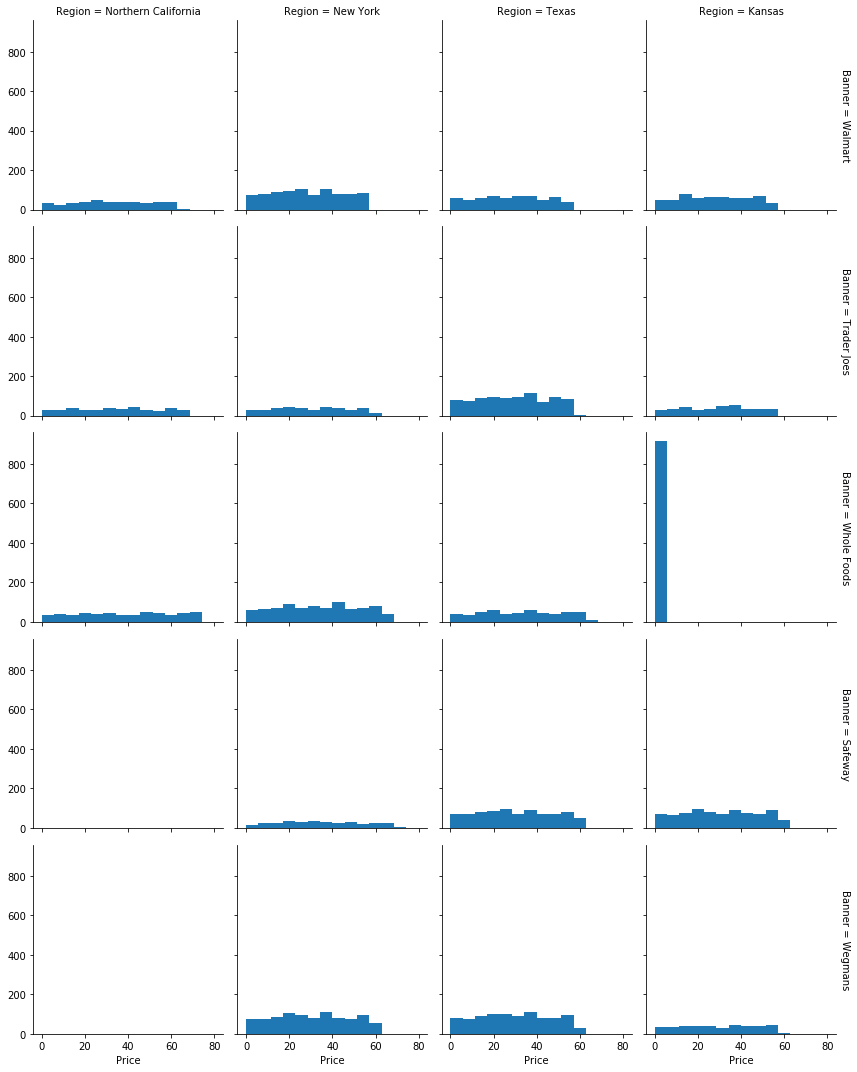

In [19]:
grid = sns.FacetGrid(result2, row="Banner", col="Region", margin_titles=True)
grid.map(plt.hist, "Price", bins=np.linspace(0, 80, 15))

### Northern California has only three banners (Not Safeway and Wegmans)
### Kansas has maximum number of Whole Foods
### Newyork has minimum number of Safeway 

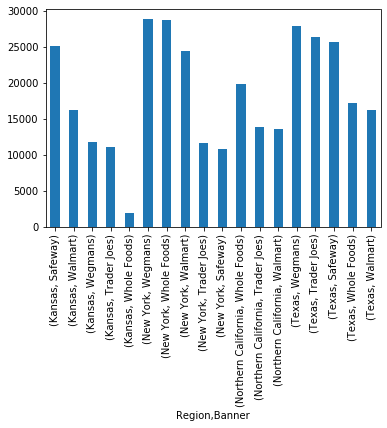

In [20]:
group = result2.groupby(["Region","Banner"]).sum()
total_price = group["Price"].groupby(level=0, group_keys=False)
gtp = total_price.nlargest(5)
ax = gtp.plot(kind="bar")

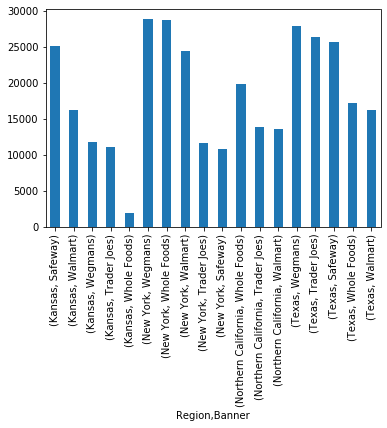

In [21]:
group = result2.groupby(["Region","Banner"]).sum()
total_price = group["Price"].groupby(level=0, group_keys=False)
gtp = total_price.nlargest(5)
ax = gtp.plot(kind="bar")
#draw lines and titles
count = gtp.groupby("Region").count()
cs = np.cumsum(count)
#numpy.cumsum() function is used when we want to compute the cumulative sum of array elements over a given axis.

In [22]:
title = count.index.values[0:3]
title

array(['Kansas', 'New York', 'Northern California'], dtype=object)

### For Kansas price of Whole foods are cheapest among all four states and all Banners.

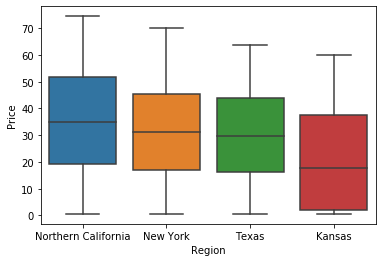

In [23]:
bx = sns.boxplot(x="Region", y="Price", data=result2)
bx

### Mean price of Kansas is minimum with maximum range.
### Mean price of Northern California is maximum.

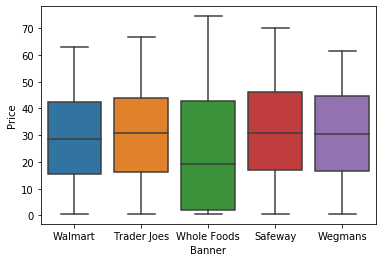

In [24]:
bx1 = sns.boxplot(x="Banner", y="Price", data=result2)
bx1

### Mean price of Kansas is minimum with maximum range.
### Mean price of North California is maximum.

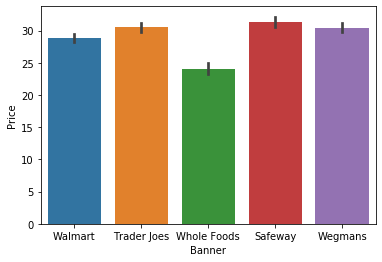

In [25]:
sns.barplot(x='Banner',y='Price',data=result2)

### Counting total number of different Banners 

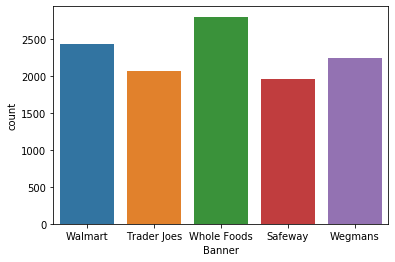

In [26]:
sns.countplot(x='Banner',data=result2)

## Export cross tabulated table as csv file.

In [27]:
import csv
results=pd.DataFrame(result3)
results.head()
results.to_csv('Cross_Table.csv',sep= ';')